In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

import preprocessor as p
from sklearn.feature_extraction.text import CountVectorizer
from pylab import *
from matplotlib import lines, markers
from cycler import cycler

In [ ]:
# Create cycler object. Use any styling from above you please
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':']) * cycler('marker', ['^',',', '.']))

print("number of items in monochrome:", len(monochrome))
for i, item in zip(range(15), monochrome()):
    print(i, item)

number of items in monochrome: 9
0 {'color': 'k', 'linestyle': '-', 'marker': '^'}
1 {'color': 'k', 'linestyle': '-', 'marker': ','}
2 {'color': 'k', 'linestyle': '-', 'marker': '.'}
3 {'color': 'k', 'linestyle': '--', 'marker': '^'}
4 {'color': 'k', 'linestyle': '--', 'marker': ','}
5 {'color': 'k', 'linestyle': '--', 'marker': '.'}
6 {'color': 'k', 'linestyle': ':', 'marker': '^'}
7 {'color': 'k', 'linestyle': ':', 'marker': ','}
8 {'color': 'k', 'linestyle': ':', 'marker': '.'}
9 {'color': 'k', 'linestyle': '-', 'marker': '^'}
10 {'color': 'k', 'linestyle': '-', 'marker': ','}
11 {'color': 'k', 'linestyle': '-', 'marker': '.'}
12 {'color': 'k', 'linestyle': '--', 'marker': '^'}
13 {'color': 'k', 'linestyle': '--', 'marker': ','}
14 {'color': 'k', 'linestyle': '--', 'marker': '.'}


In [ ]:
January = "JSONs/1.json"
February = "JSONs/2.json"
March = "JSONs/3.json"
April = "JSONs/4.json"
May = "JSONs/5.json"
June = "JSONs/6.json"
July = "JSONs/7.json"
August = "JSONs/8.json"
September = "JSONs/9.json"
October = "JSONs/10.json"
November = "JSONs/11.json"
December = "JSONs/12.json"

In [ ]:
def read_json(path):
    df = pd.read_json(path)
    return df

In [ ]:
def preprocess(df):
    testing = df['full_text']
    cleaned = []
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.SMILEY, p.OPT.EMOJI, 	p.OPT.NUMBER)
    for i in testing:
        cleaned.append(p.clean(i))
    df['Clean_Tweet'] = pd.Series(cleaned)
    df['Clean_Tweet'] = df['Clean_Tweet'].astype(str)
    
    return df

In [ ]:
def tfidf(df, month):
    from wordcloud import WordCloud, STOPWORDS
    comment_words = '' 
    stopwords = set(STOPWORDS) 
    stopwords.update(["u", "now", "coronaviru", "de", "di", "la", "lo", "en", "viru", "will", "el", "th", "y", "r", "viru"])

    for val in df['Clean_Tweet']: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(background_color ='white', max_words = 50,
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    #tfidf
    freq = wordcloud.words_
    print("Wordclouds Frequency:")
    print(freq)
    i = 0
    values = []
    labels = []

    for word in freq:
        labels.append(word)
        i = i + 1
        if i == 10:
            break

    i= 0

    for word in freq.values():
        values.append(word)
        i = i + 1
        if i == 10:
            break
    
    fig, ax = plt.subplots(1,1)
    ax.set_prop_cycle(monochrome)
    ax.plot(labels, values)
    fig.suptitle("tfidf - " + month)
    ax.tick_params(labelrotation=90)
    #ax.set_xticklabels(rotation = 90)
    plt.show()
    
    cv = CountVectorizer(stop_words = 'english')
    words = cv.fit_transform(df.Clean_Tweet)

    sum_words = words.sum(axis=0)

    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

    frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'black')
    plt.title("Most Frequently Occuring Words - " + month)
    plt.show()

In [ ]:
def sentiment_analysis(df,month):
    sentiment = []

    for i in df['Clean_Tweet']:
        analysis = TextBlob(i) 
        sentiment.append(analysis.sentiment.polarity)
        
    actual = []
    for i in sentiment:
        if i > 0:
            actual.append('Positive')
        #elif i > 0 and i <= 0.2 :
            #actual.append('Neutral')
        else:
            actual.append('Negative')
            
    df['Sentiment'] = pd.Series(actual)
    df['Sentiment'] = df['Sentiment'].astype(str)
    
    fig,ax = plt.subplots(1,1)
    wedges, texts = ax.pie(df['Sentiment'].value_counts(), labels = round(df['Sentiment'].value_counts(normalize = True)*100,2),
                           colors = ['white', 'black'],
                           wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'dashed', 'antialiased': True})
    for j, patch in enumerate(wedges):
        if j == 0:
            patch.set_hatch('|')
    gca().set_aspect('equal')
    
    plt.legend(wedges, df['Sentiment'].value_counts().index.tolist(), loc="best")
    #plt.suptitle('Sentiment - ' + month)
    plt.show()
    
    print(df['Sentiment'].value_counts(normalize = True)*100)
    
    return df

In [ ]:
def report(PATH, month):
    df = read_json(PATH)
    df = preprocess(df)
    tfidf(df, month)
    df = sentiment_analysis(df, month)

Wordclouds Frequency:
{'coronavirus': 1.0, 'china': 0.7899287894201424, 'wuhan': 0.32706002034587994, 'case': 0.14089521871820956, 'virus': 0.13072227873855544, 'people': 0.12207527975584945, 'breaking': 0.12054933875890132, 'coronavirus outbreak': 0.12054933875890132, 'outbreak': 0.10528992878942015, 'us': 0.10071210579857579, 'amp': 0.09766022380467955, 'corona virus': 0.09715157680569685, 'confirmed': 0.09613428280773144, 'one': 0.09409969481180061, 'confirmed case': 0.09257375381485249, 'hospital': 0.09053916581892167, 'say': 0.08697863682604273, 's': 0.08545269582909461, 'spread': 0.08545269582909461, 'new': 0.08036622583926754, 'novel coronavirus': 0.07833163784333673, 'wuhan china': 0.07477110885045778, 'new coronavirus': 0.07426246185147507, 'wuhan coronavirus': 0.07324516785350967, 'flight': 0.07273652085452696, 'ncov': 0.07121057985757884, 'day': 0.06408952187182096, 'chinese': 0.06307222787385554, 'time': 0.06154628687690743, 'government': 0.06052899287894201, 'wuhan virus':

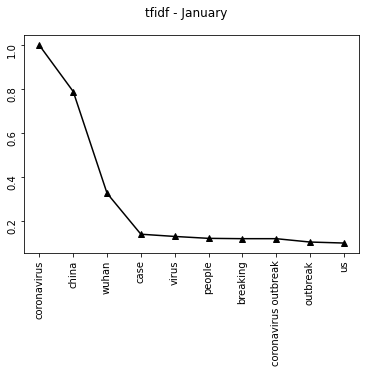

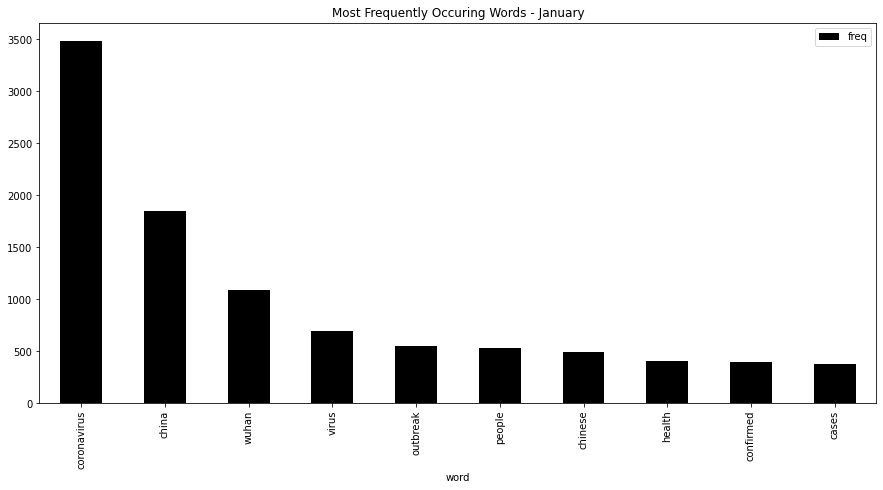

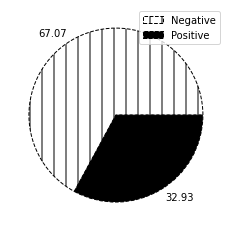

Negative    67.067978
Positive    32.932022
Name: Sentiment, dtype: float64


In [ ]:
report(January, "January")

Wordclouds Frequency:
{'coronavirus': 1.0, 'china': 0.6378030677882236, 'que': 0.22909450766947057, 'e': 0.14844136566056407, 'wuhan': 0.13904007916872835, 'people': 0.13161801088570016, 'un': 0.11974270163285503, 'trump': 0.10786739238000989, 'us': 0.10390895596239486, 'amp': 0.09896091044037605, 'le': 0.09698169223156854, 'virus': 0.09599208312716477, 'covid': 0.09203364670954972, 'corona virus': 0.09153884215734785, 'case': 0.08659079663532905, 'corona': 0.08609599208312717, 'se': 0.08560118753092529, 'los': 0.0851063829787234, 'new': 0.08461157842652152, 's': 0.07916872835230084, 'por': 0.07718951014349332, 'chinese': 0.0752102919346858, 'one': 0.07422068283028203, 'cdc': 0.06927263730826323, 'say': 0.06927263730826323, 'con': 0.06679861454725383, 'para': 0.06630380999505195, 'covid19': 0.06382978723404255, 'coronavirus outbreak': 0.06382978723404255, 'spread': 0.061355764473033154, 'del': 0.05987135081642751, 'o': 0.05987135081642751, 'time': 0.058881741712023754, 'world': 0.05838

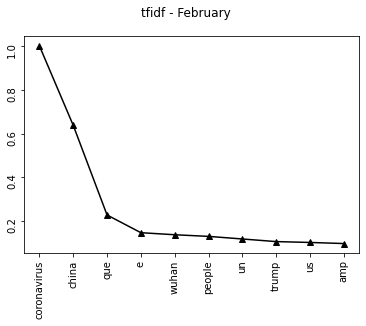

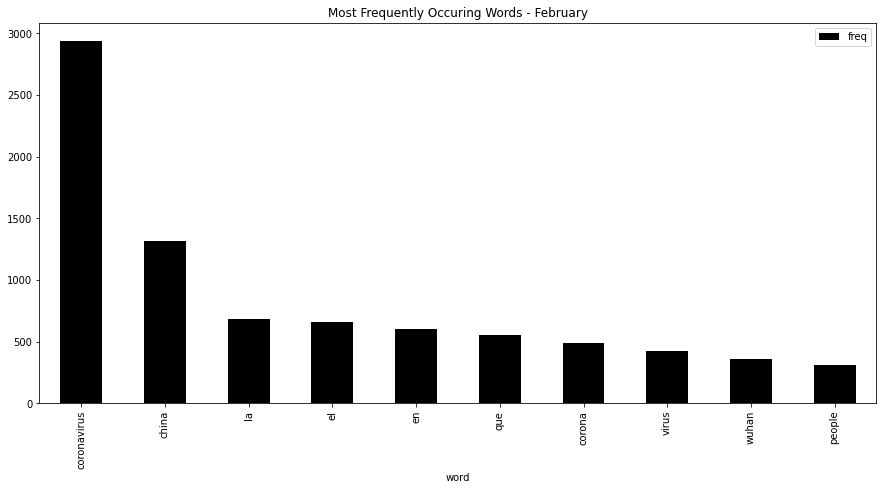

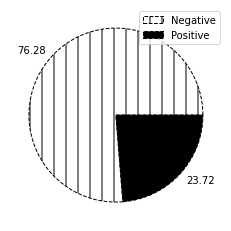

Negative    76.2788
Positive    23.7212
Name: Sentiment, dtype: float64


In [ ]:
report(February, "February")

Wordclouds Frequency:
{'coronavirus': 1.0, 'covid': 0.33557046979865773, 'que': 0.24935467217346413, 'covid19': 0.23902942694889004, 'people': 0.20185854414042334, 'china': 0.20134228187919462, 'corona': 0.16881775942178626, 'trump': 0.13990707279297884, 'e': 0.137842023748064, 'corona virus': 0.1254517294785751, 'amp': 0.11874032008260196, 'un': 0.1120289106866288, 'us': 0.10635002581311306, 'se': 0.10376871450696953, 'le': 0.0986060918946825, 'say': 0.09602478058853897, 'o': 0.09395973154362416, 'new': 0.09292720702116675, 'los': 0.09241094475993805, 's': 0.08828084667010841, 'con': 0.08828084667010841, 'one': 0.0867320598864223, 'virus': 0.0856995353639649, 'para': 0.08311822405782138, 'case': 0.08208569953536396, 'day': 0.08208569953536396, 'por': 0.07847186370676304, 'pandemic': 0.07640681466184822, 'time': 0.073309241094476, 'need': 0.06504904491481672, 'm': 0.06246773360867321, 'da': 0.06246773360867321, 'del': 0.061435209086215796, 'lockdown': 0.05782137325761487, 'know': 0.057

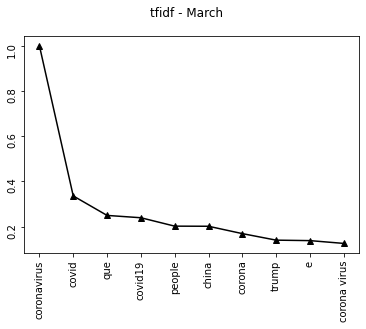

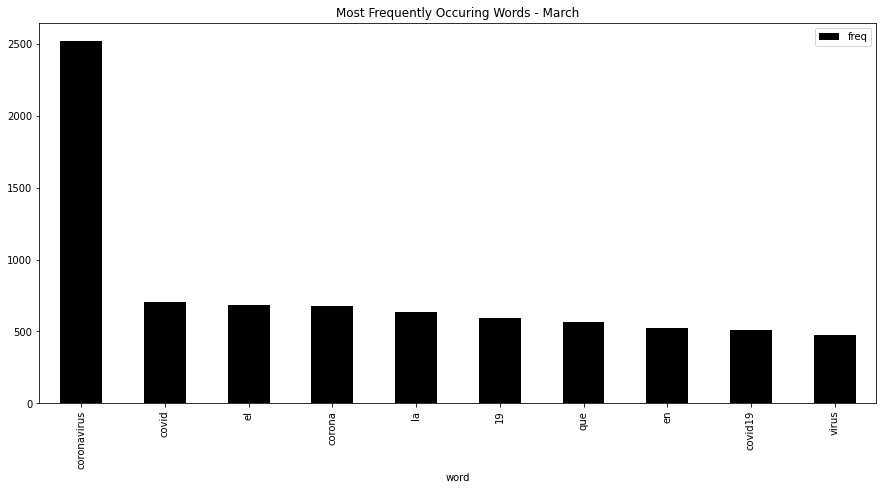

Negative    73.631841
Positive    26.368159
Name: Sentiment, dtype: float64


In [ ]:
report(March, "March")

Wordclouds Frequency:
{'covid': 1.0, 'coronavirus': 0.9753846153846154, 'covid19': 0.7374358974358974, 'que': 0.5282051282051282, 'lockdown': 0.38564102564102565, 'e': 0.34564102564102567, 'china': 0.3282051282051282, 'people': 0.3241025641025641, 'amp': 0.2882051282051282, 'pandemic': 0.25846153846153846, 'corona': 0.25743589743589745, 'trump': 0.2441025641025641, 'un': 0.2441025641025641, 'le': 0.2358974358974359, 'us': 0.22666666666666666, 'new': 0.2235897435897436, 'los': 0.2205128205128205, 'se': 0.2, 'para': 0.19487179487179487, 'por': 0.18871794871794872, 'one': 0.18256410256410258, 'o': 0.18153846153846154, 'time': 0.1794871794871795, 'con': 0.1764102564102564, 'say': 0.16923076923076924, 's': 0.1682051282051282, 'virus': 0.1641025641025641, 'need': 0.1641025641025641, 'del': 0.16205128205128205, 'home': 0.15692307692307692, 'today': 0.14871794871794872, 'al': 0.14666666666666667, 'm': 0.14666666666666667, 'da': 0.13641025641025642, 'day': 0.13538461538461538, 'death': 0.135384

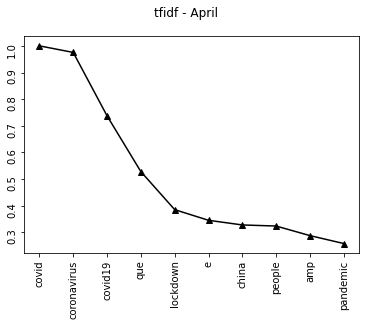

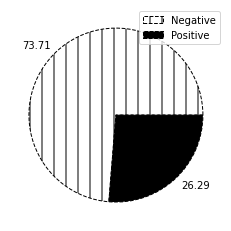

Negative    73.705179
Positive    26.294821
Name: Sentiment, dtype: float64


In [ ]:
report(April, "April")

Wordclouds Frequency:
{'covid': 1.0, 'coronavirus': 0.6106048053024027, 'covid19': 0.48301574150787074, 'que': 0.46893123446561724, 'lockdown': 0.44573322286661143, 'pandemic': 0.3603976801988401, 'e': 0.299917149958575, 'amp': 0.2874896437448219, 'people': 0.2659486329743165, 'corona': 0.24606462303231152, 'o': 0.2104391052195526, 'se': 0.2087821043910522, 'new': 0.18889809444904723, 'us': 0.1855840927920464, 'time': 0.18061309030654515, 'trump': 0.17729908864954433, 'para': 0.17647058823529413, 'los': 0.17232808616404308, 'one': 0.17149958574979288, 'con': 0.1632145816072908, 'le': 0.1623860811930406, 'un': 0.16072908036454017, 'por': 0.15907207953603977, 'da': 0.15824357912178957, 'day': 0.1491300745650373, 'm': 0.14830157415078707, 's': 0.1375310687655344, 'say': 0.13256006628003314, 'today': 0.12096106048053024, 'del': 0.11847555923777962, 'virus': 0.11184755592377796, 'social distancing': 0.10770505385252693, 'las': 0.1052195526097763, 'al': 0.1052195526097763, 'state': 0.1019055

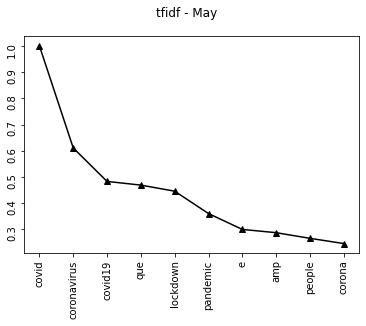

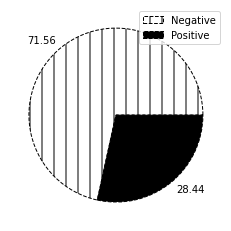

Negative    71.56486
Positive    28.43514
Name: Sentiment, dtype: float64


In [ ]:
report(May, "May")

Wordclouds Frequency:
{'covid': 1.0, 'coronavirus': 0.46530872056015277, 'que': 0.4137492043284532, 'covid19': 0.3730108211330363, 'pandemic': 0.31954169318905157, 'people': 0.2622533418204965, 'e': 0.2558879694462126, 'lockdown': 0.2259707192870783, 'amp': 0.20496499045194144, 'corona': 0.19669000636537237, 'o': 0.18586887332908975, 'se': 0.1654996817313813, 'un': 0.16422660725652452, 'los': 0.15085932527052834, 'para': 0.15022278803309994, 'trump': 0.1464035646085296, 'new': 0.14449395289624442, 'us': 0.1349458943348186, 'da': 0.13303628262253342, 'con': 0.12858052196053468, 'one': 0.12667091024824953, 'mask': 0.12285168682367918, 'le': 0.1215786123488224, 'por': 0.11775938892425207, 'day': 0.11075747931253978, 'say': 0.10757479312539783, 'social distancing': 0.10184595798854233, 'time': 0.10057288351368555, 's': 0.098026734563972, 'al': 0.098026734563972, 'm': 0.098026734563972, 'today': 0.09420751113940165, 'still': 0.0916613621896881, 'del': 0.0916613621896881, 'need': 0.088478676

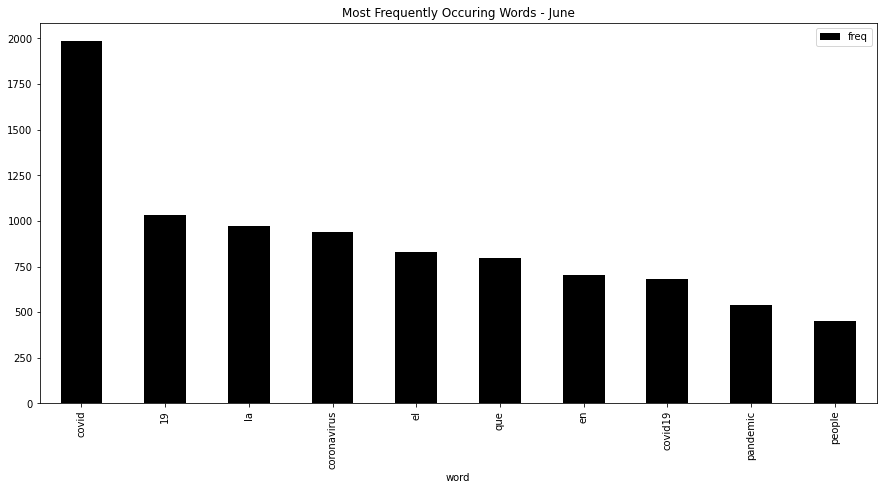

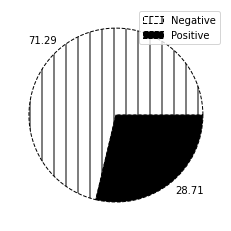

Negative    71.289288
Positive    28.710712
Name: Sentiment, dtype: float64


In [ ]:
report(June, "June")

Wordclouds Frequency:
{'covid': 1.0, 'coronavirus': 0.39152542372881355, 'covid19': 0.307909604519774, 'que': 0.28135593220338984, 'pandemic': 0.27796610169491526, 'mask': 0.25310734463276835, 'people': 0.21977401129943502, 'e': 0.18700564971751413, 'amp': 0.17062146892655367, 'wear': 0.1694915254237288, 'new': 0.16045197740112993, 'corona': 0.14463276836158193, 'trump': 0.1423728813559322, 'o': 0.13615819209039548, 'lockdown': 0.12768361581920903, 'say': 0.12429378531073447, 'se': 0.12316384180790961, 'us': 0.11807909604519774, 'one': 0.11638418079096045, 'los': 0.10847457627118644, 'un': 0.10790960451977401, 'para': 0.10790960451977401, 'con': 0.10621468926553672, 'time': 0.10564971751412429, 's': 0.10451977401129943, 'm': 0.103954802259887, 'por': 0.10056497175141244, 'day': 0.09378531073446328, 'da': 0.09265536723163842, 'today': 0.08418079096045197, 'virus': 0.08361581920903954, 'le': 0.07966101694915254, 'hospital': 0.07514124293785311, 'del': 0.07344632768361582, 'need': 0.07344

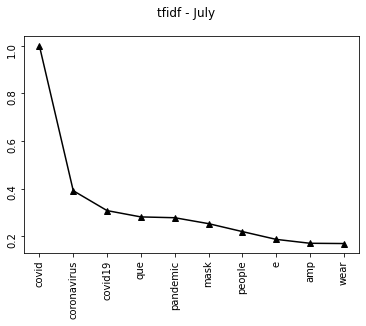

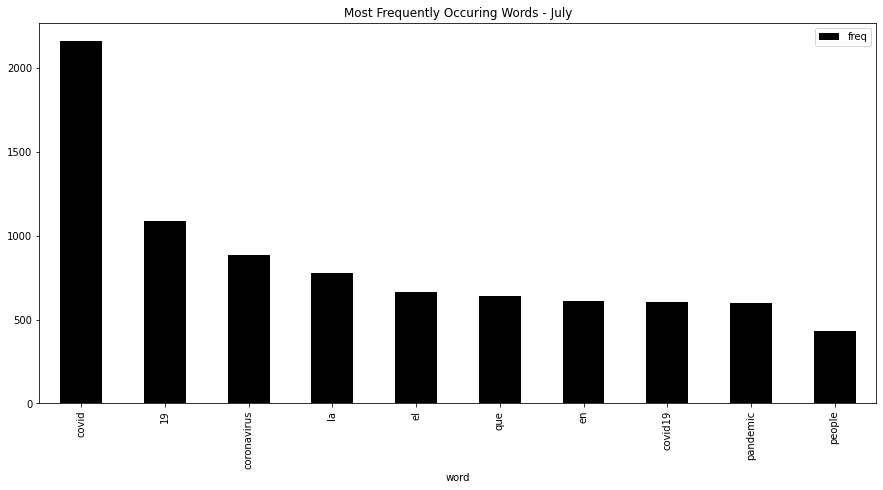

Negative    70.472136
Positive    29.527864
Name: Sentiment, dtype: float64


In [ ]:
report(July, "July")

Wordclouds Frequency:
{'covid': 1.0, 'pandemic': 0.3463626492942454, 'que': 0.32138979370249726, 'coronavirus': 0.31976112920738325, 'covid19': 0.2692725298588491, 'e': 0.20521172638436483, 'people': 0.18783930510314875, 'amp': 0.16232356134636264, 'corona': 0.15200868621064062, 'student': 0.1482084690553746, 'trump': 0.14277958740499458, 'o': 0.14060803474484257, 'new': 0.14006514657980457, 'los': 0.13083604777415853, 'se': 0.1259500542888165, 'para': 0.1254071661237785, 'un': 0.12052117263843648, 'lockdown': 0.11943539630836048, 'mask': 0.11889250814332247, 'con': 0.11454940282301845, 'time': 0.10640608034744843, 'por': 0.10586319218241043, 'le': 0.10586319218241043, 'one': 0.10152008686210641, 'm': 0.09554831704668838, 'day': 0.09554831704668838, 'da': 0.09500542888165038, 'us': 0.09337676438653637, 'say': 0.09011943539630836, 'today': 0.08360477741585233, 'del': 0.08143322475570032, 'exam': 0.08089033659066232, 'virus': 0.07926167209554831, 'al': 0.07926167209554831, 'need': 0.0738

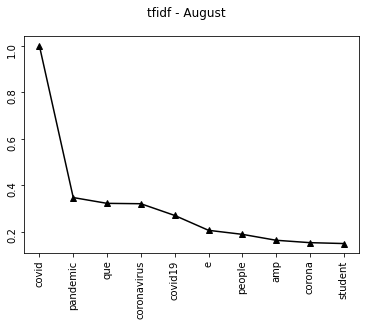

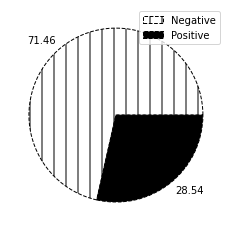

Negative    71.458306
Positive    28.541694
Name: Sentiment, dtype: float64


In [ ]:
report(August, "August")

Wordclouds Frequency:
{'covid': 1.0, 'coronavirus': 0.2907874420998456, 'pandemic': 0.2856407617086979, 'que': 0.2655687081832218, 'covid19': 0.26505404014410705, 'people': 0.20226453937210498, 'trump': 0.1966031909418425, 'amp': 0.19042717447246527, 'e': 0.17807514153371076, 'corona': 0.15851775604734947, 'lockdown': 0.1363870303654143, 'new': 0.13432835820895522, 'mask': 0.11219763252702007, 'un': 0.11116829644879053, 'le': 0.1080802882141019, 'se': 0.10756562017498714, 'los': 0.10705095213587236, 'one': 0.10550694801852804, 'say': 0.1044776119402985, 'o': 0.10190427174472465, 'con': 0.10036026762738035, 'us': 0.09366958311888832, 'day': 0.092125579001544, 'para': 0.08955223880597014, 'virus': 0.08749356664951106, 'por': 0.08646423057128153, 'del': 0.08492022645393721, 'time': 0.08389089037570767, 'm': 0.08286155429747813, 'al': 0.08234688625836335, 's': 0.0782295419454452, 'wear': 0.07771487390633042, 'school': 0.07514153371075656, 'da': 0.07462686567164178, 'today': 0.0735975295934

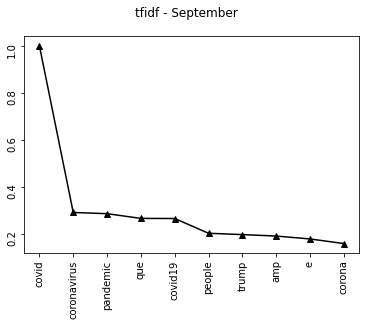

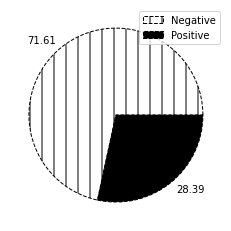

Negative    71.605719
Positive    28.394281
Name: Sentiment, dtype: float64


In [ ]:
report(September, "September")

Wordclouds Frequency:
{'covid': 1.0, 'trump': 0.2858517805582291, 'pandemic': 0.28103946102021177, 'coronavirus': 0.23532242540904716, 'covid19': 0.23195380173243504, 'que': 0.20596727622714148, 'people': 0.1958614051973051, 'amp': 0.1616939364773821, 'e': 0.15591915303176132, 'lockdown': 0.15351299326275264, 'mask': 0.12800769971126083, 'new': 0.12271414821944177, 'us': 0.11116458132820019, 'say': 0.109720885466795, 'le': 0.10731472569778633, 'o': 0.10442733397497594, 'one': 0.1039461020211742, 'corona': 0.1039461020211742, 'day': 0.09143407122232916, 'por': 0.0904716073147257, 'virus': 0.08999037536092397, 'se': 0.08902791145332051, 'president': 0.0846968238691049, 'time': 0.08180943214629452, 'un': 0.07988450433108758, 'die': 0.07892204042348412, 's': 0.07844080846968239, 'need': 0.07651588065447545, 'da': 0.07507218479307026, 'para': 0.0697786333012512, 'case': 0.06929740134744947, 'going': 0.06929740134744947, 'wear': 0.06881616939364774, 'today': 0.068334937439846, 'government': 

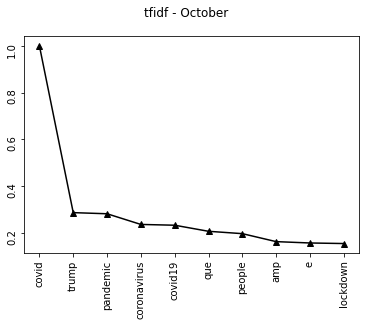

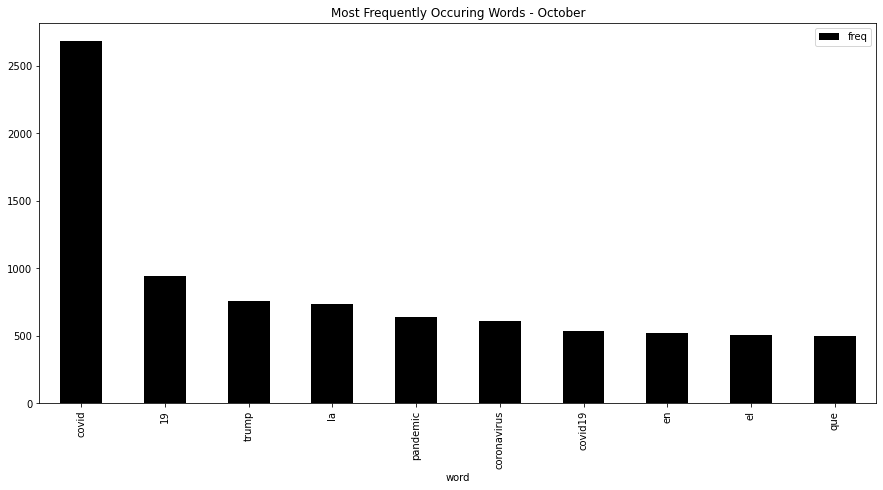

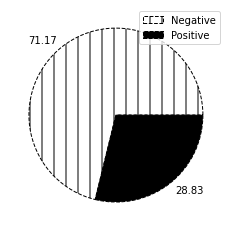

Negative    71.167613
Positive    28.832387
Name: Sentiment, dtype: float64


In [ ]:
report(October, "October")

Wordclouds Frequency:
{'covid': 1.0, 'pandemic': 0.2851952770208901, 'people': 0.24795640326975477, 'covid19': 0.240236148955495, 'lockdown': 0.21162579473206175, 'coronavirus': 0.20345140781108084, 'que': 0.19981834695731154, 'e': 0.15803814713896458, 'amp': 0.14713896457765668, 'new': 0.14305177111716622, 'trump': 0.1335149863760218, 'mask': 0.11353315168029064, 'o': 0.11262488646684832, 'one': 0.10944595821980019, 'day': 0.10535876475930972, 'se': 0.10036330608537693, 'corona': 0.09809264305177112, 'us': 0.09673024523160763, 'un': 0.09491371480472298, 'le': 0.09173478655767484, 'da': 0.08946412352406903, 'time': 0.08583106267029973, 'need': 0.08583106267029973, 's': 0.08356039963669391, 'year': 0.07947320617620345, 'say': 0.07720254314259764, 'know': 0.07447774750227067, 'going': 0.07356948228882834, 'die': 0.07266121707538602, 'today': 0.07220708446866485, 'para': 0.07084468664850137, 'still': 0.0667574931880109, 'want': 0.06584922797456857, 'del': 0.06494096276112625, 'im': 0.0644

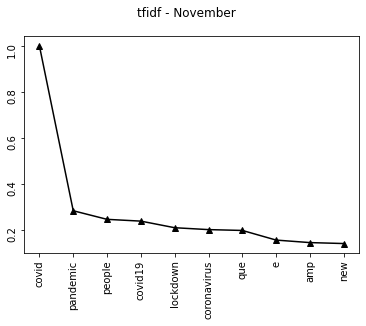

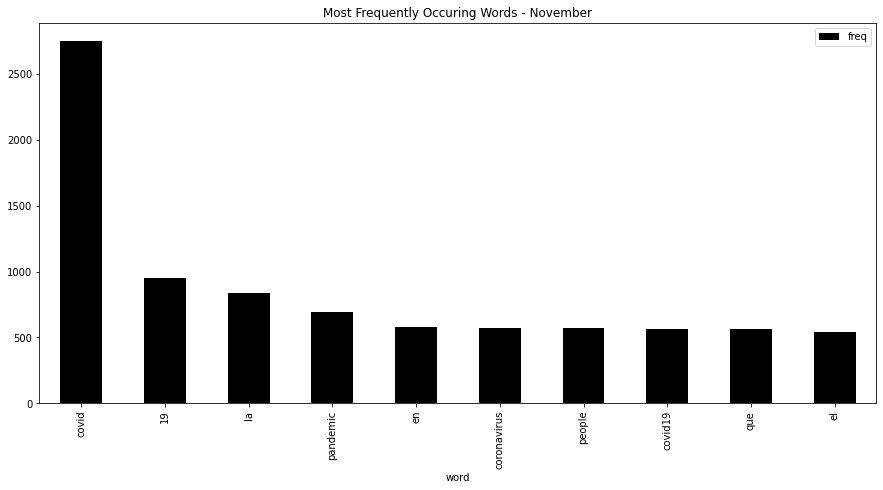

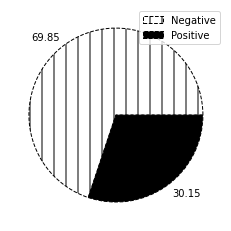

Negative    69.851252
Positive    30.148748
Name: Sentiment, dtype: float64


In [ ]:
report(November, "November")

Wordclouds Frequency:
{'covid': 1.0, 'pandemic': 0.2667257421355782, 'covid19': 0.2361541869738591, 'que': 0.21976074435090828, 'people': 0.18254319893664156, 'coronavirus': 0.17279574656623836, 'amp': 0.16171909614532565, 'e': 0.16083296411165263, 'lockdown': 0.13424900310146212, 'o': 0.11519716437749225, 'corona': 0.11386796632698272, 'new': 0.10544971200708905, 'le': 0.0979175897208684, 'vaccine': 0.09703145768719539, 'one': 0.09570225963668587, 'un': 0.09437306158617634, 'da': 0.0921577315019938, 'day': 0.09082853345148427, 'us': 0.08684093929995569, 'se': 0.08595480726628267, 'year': 0.08595480726628267, 'covid vaccine': 0.08506867523260966, 'mask': 0.08285334514842711, 'con': 0.0815241470979176, 'need': 0.07930881701373504, 'trump': 0.07886575099689853, 'para': 0.07842268498006202, 'today': 0.076650420912716, 'time': 0.076650420912716, 'los': 0.07399202481169695, 'say': 0.07266282676118742, 's': 0.07089056269384138, 'death': 0.06778910057598582, 'know': 0.06734603455914931, 'm': 

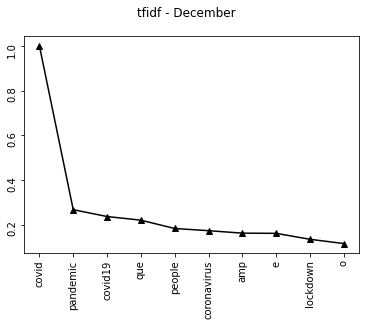

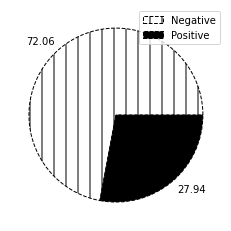

Negative    72.055259
Positive    27.944741
Name: Sentiment, dtype: float64


In [ ]:
report(December, "December")

In [ ]:
df1 = pd.read_json(January)
df2 = pd.read_json(February)
df3 = pd.read_json(March)
df4 = pd.read_json(April)
df5 = pd.read_json(May)
df6 = pd.read_json(June)
df7 = pd.read_json(July)
df8 = pd.read_json(August)
df9 = pd.read_json(September)
df10 = pd.read_json(October)
df11 = pd.read_json(November)
df12 = pd.read_json(December)

In [ ]:
year_months = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

year = pd.concat(year_months)

Wordclouds Frequency:
{'coronavirus': 1.0, 'china': 0.9451068350844056, 'wuhan': 0.41659780427340337, 'coronavirus outbreak': 0.3542675008853736, 'corona virus': 0.3069295242592374, 'confirmed case': 0.26490378939912645, 'novel coronavirus': 0.23019714319442805, 'new coronavirus': 0.21626726478573957, 'wuhan china': 0.21307991972612442, 'wuhan coronavirus': 0.21012867430055485, 'hong kong': 0.17483177901074254, 'wuhan virus': 0.17046393578089955, 'public health': 0.1420139298784087, 'know': 0.1346948412229961, 'death toll': 0.13221579506551764, 'coronavirus case': 0.13162554598040374, 'first case': 0.13150749616338095, 'one': 0.12300790933774053, 'country': 0.12017471372919372, 'need': 0.11970251446110258, 'china coronavirus': 0.11368197379294062, 'health emergency': 0.1101404792822571, 'virus outbreak': 0.09632865069059143, 'see': 0.08889151221815607, 'chinese people': 0.08841931295006493, 'man': 0.08664856569472318, 'coronavirus patient': 0.08511391807342698, 'want': 0.08487781843938

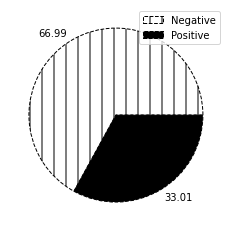

Negative    66.98698
Positive    33.01302
Name: Sentiment, dtype: float64


In [ ]:
year = preprocess(year)
tfidf(year, "2020")
year = sentiment_analysis(year, "2020")

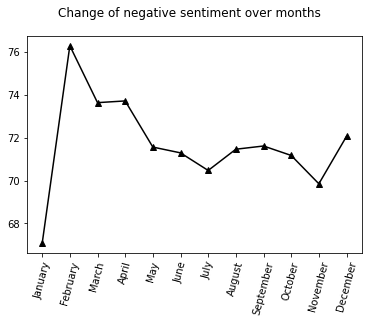

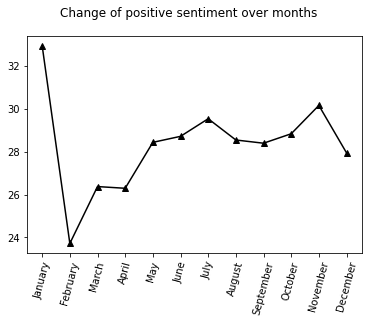

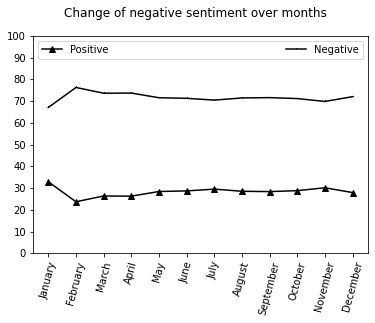

In [ ]:
negative = [67.07, 76.28, 73.63, 73.71, 71.56, 71.29, 70.47, 71.46, 71.61, 71.17, 69.85, 72.06]
positive = [32.93, 23.72, 26.37, 26.29, 28.43, 28.71, 29.53, 28.54, 28.39, 28.83, 30.15, 27.94]
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
         "November", "December"]
yaxis = [0,10,20,30,40,50,60,70,80,90,100]
serial = [0,1,2,3,4,5,6,7,8,9,10,11]

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)
ax.plot(negative)
fig.suptitle("Change of negative sentiment over months")
ax.set_xticks(serial)
ax.set_xticklabels(labels, rotation = 75)
plt.show()

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)
ax.plot(positive)
fig.suptitle("Change of positive sentiment over months")
ax.set_xticks(serial)
ax.set_xticklabels(labels, rotation = 75)
plt.show()

fig, ax = plt.subplots(1,1)
ax.set_prop_cycle(monochrome)
ax.plot(positive, label = 'Positive')
ax.plot(negative, label = 'Negative')
fig.suptitle("Change of negative sentiment over months")
ax.set_xticks(serial)
ax.set_xticklabels(labels, rotation = 75)
ax.set_yticks(yaxis)
ax.legend(loc = 'upper right', mode = 'expand', ncol = 2)
plt.show()